# Data Visualization Project: Indian Power Sector at a Glance

In [3]:
import pandas as pd
from plotnine import *
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:/Users/PC/Desktop/Work/DVProject/Power/Installed_Power_Capacity_State_wise_MW.csv")
df.head()  

,id,month,region,state,coal,gas,diesel,thermal_total,nuclear,hydro,res,grand_total
0,1,Jan-2019,Northern,Chandigarh,0.0,0.00,0.0,0.00,0.0,0.00,32.40,32.40
1,2,Jan-2019,Northern,Delhi,135.0,2208.40,0.0,2343.40,0.0,0.00,176.21,2519.61
2,3,Jan-2019,Northern,Haryana,5540.0,431.59,0.0,5971.59,0.0,0.00,411.99,6383.58
3,4,Jan-2019,Northern,Himachal Pradesh,0.0,0.00,0.0,0.00,0.0,9809.02,864.50,10673.52
4,5,Jan-2019,Northern,Jammu and Kashmir,0.0,175.00,0.0,175.00,0.0,3449.00,188.88,3812.88


In [6]:
df['year'] = df['month'].str[-4:].astype(int)
df['state'] = df['state'].replace({'Andhra Pradesh.': 'Andhra Pradesh'})
df[['Month', 'Year']] = df['month'].str.split('-', n=1, expand=True)
df.head()

,id,month,region,state,coal,gas,diesel,thermal_total,nuclear,hydro,res,grand_total,year,Month,Year
0,1,Jan-2019,Northern,Chandigarh,0.0,0.00,0.0,0.00,0.0,0.00,32.40,32.40,2019,Jan,2019
1,2,Jan-2019,Northern,Delhi,135.0,2208.40,0.0,2343.40,0.0,0.00,176.21,2519.61,2019,Jan,2019
2,3,Jan-2019,Northern,Haryana,5540.0,431.59,0.0,5971.59,0.0,0.00,411.99,6383.58,2019,Jan,2019
3,4,Jan-2019,Northern,Himachal Pradesh,0.0,0.00,0.0,0.00,0.0,9809.02,864.50,10673.52,2019,Jan,2019
4,5,Jan-2019,Northern,Jammu and Kashmir,0.0,175.00,0.0,175.00,0.0,3449.00,188.88,3812.88,2019,Jan,2019


In [7]:
df_diu = df[df["state"] == "Daman & Diu"]
df_dnh = df[df["state"] == "Dadra & Nagar Haveli"]

df_diu_sum = df_diu.groupby(["month", "Year", "region"]).sum()
df_dnh_sum = df_dnh.groupby(["month", "Year", "region"]).sum()

df_combined = df_diu_sum.add(df_dnh_sum, fill_value=0)
 
df_combined["state"] = "Dadra and Nagar Haveli and Dam"

df_combined.reset_index(inplace=True)
df_combined.drop('year', axis=1, inplace=True)
df_combined = df_combined[['id', 'month', 'region', 'state', 'coal', 'gas', 'diesel', 'thermal_total', 'nuclear', 'hydro', 'res', 'grand_total']]
df_combined.head()

,id,month,region,state,coal,gas,diesel,thermal_total,nuclear,hydro,res,grand_total
0,251,Apr-2019,Western,Dadra and Nagar Haveli and Dam,0.0,0.0,0.0,0.0,0.0,0.0,19.93,19.93
1,1123,Apr-2020,Western,Dadra and Nagar Haveli and Dam,0.0,0.0,0.0,0.0,0.0,0.0,25.32,25.32
2,2011,Apr-2021,Western,Dadra and Nagar Haveli and Dam,0.0,0.0,0.0,0.0,0.0,0.0,46.01,46.01
3,539,Aug-2019,Western,Dadra and Nagar Haveli and Dam,0.0,0.0,0.0,0.0,0.0,0.0,20.91,20.91
4,1419,Aug-2020,Western,Dadra and Nagar Haveli and Dam,0.0,0.0,0.0,0.0,0.0,0.0,32.24,32.24


In [8]:
df = pd.read_csv("C:/Users/PC/Desktop/Work/DVProject/Power/Installed_Power_Capacity_State_wise_MW.csv")
df = df.drop(df[(df['state'] == 'Dadra & Nagar Haveli') | (df['state'] == 'Daman & Diu')].index)
df = pd.concat([df, df_combined])
df.reset_index(drop=True, inplace=True)
df.head()

,id,month,region,state,coal,gas,diesel,thermal_total,nuclear,hydro,res,grand_total
0,1,Jan-2019,Northern,Chandigarh,0.0,0.00,0.0,0.00,0.0,0.00,32.40,32.40
1,2,Jan-2019,Northern,Delhi,135.0,2208.40,0.0,2343.40,0.0,0.00,176.21,2519.61
2,3,Jan-2019,Northern,Haryana,5540.0,431.59,0.0,5971.59,0.0,0.00,411.99,6383.58
3,4,Jan-2019,Northern,Himachal Pradesh,0.0,0.00,0.0,0.00,0.0,9809.02,864.50,10673.52
4,5,Jan-2019,Northern,Jammu and Kashmir,0.0,175.00,0.0,175.00,0.0,3449.00,188.88,3812.88


In [9]:
df['year'] = df['month'].str[-4:].astype(int)
df['state'] = df['state'].replace({'Andhra Pradesh.': 'Andhra Pradesh'})
df[['Month', 'Year']] = df['month'].str.split('-', n=1, expand=True)
df["state"].replace("Dadra and Nagar Haveli and Dam", "Dadra Nagar Haveli and Daman and Diu", inplace=True)
df.head()

,id,month,region,state,coal,gas,diesel,thermal_total,nuclear,hydro,res,grand_total,year,Month,Year
0,1,Jan-2019,Northern,Chandigarh,0.0,0.00,0.0,0.00,0.0,0.00,32.40,32.40,2019,Jan,2019
1,2,Jan-2019,Northern,Delhi,135.0,2208.40,0.0,2343.40,0.0,0.00,176.21,2519.61,2019,Jan,2019
2,3,Jan-2019,Northern,Haryana,5540.0,431.59,0.0,5971.59,0.0,0.00,411.99,6383.58,2019,Jan,2019
3,4,Jan-2019,Northern,Himachal Pradesh,0.0,0.00,0.0,0.00,0.0,9809.02,864.50,10673.52,2019,Jan,2019
4,5,Jan-2019,Northern,Jammu and Kashmir,0.0,175.00,0.0,175.00,0.0,3449.00,188.88,3812.88,2019,Jan,2019


<AxesSubplot:title={'center':'Total Installed Power Capacity by Region'}, xlabel='region'>

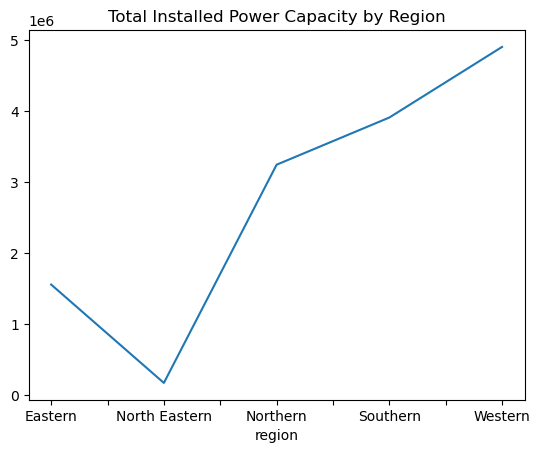

In [10]:
# Group the DataFrame by region and calculate the sum of the grand_total column for each region
df_grouped = df.groupby('region')['grand_total'].sum()

# Create a line chart of the total installed power capacity by region
df_grouped.plot(kind='line', x='region', y='grand_total', title='Total Installed Power Capacity by Region')


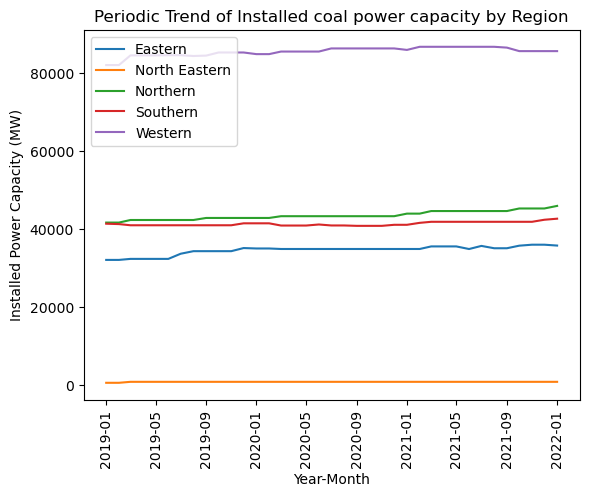

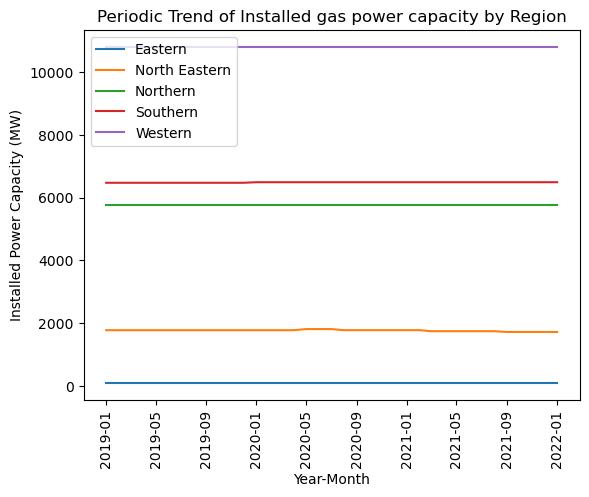

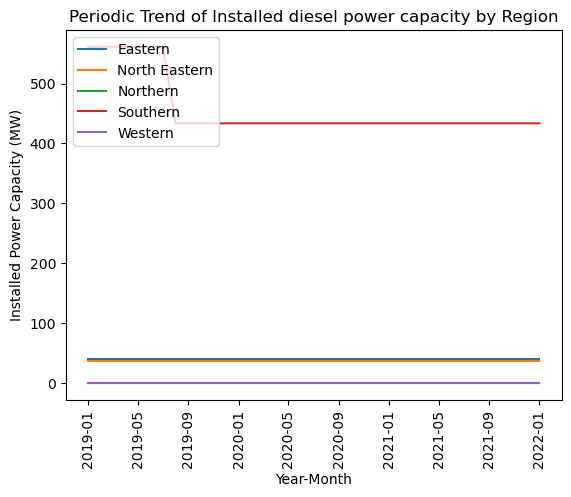

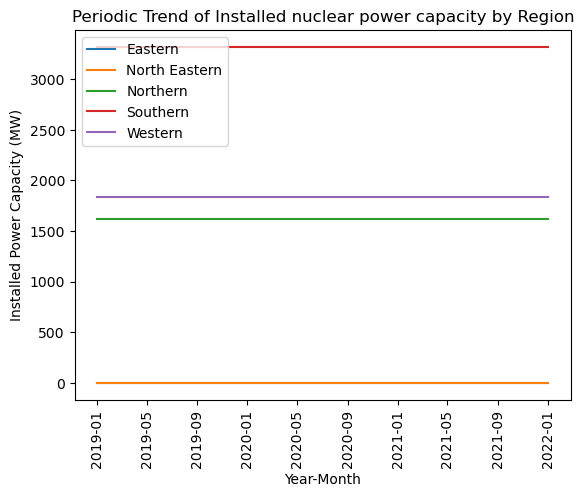

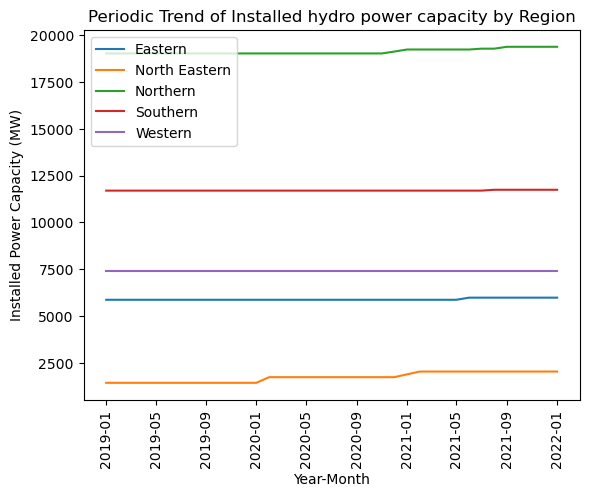

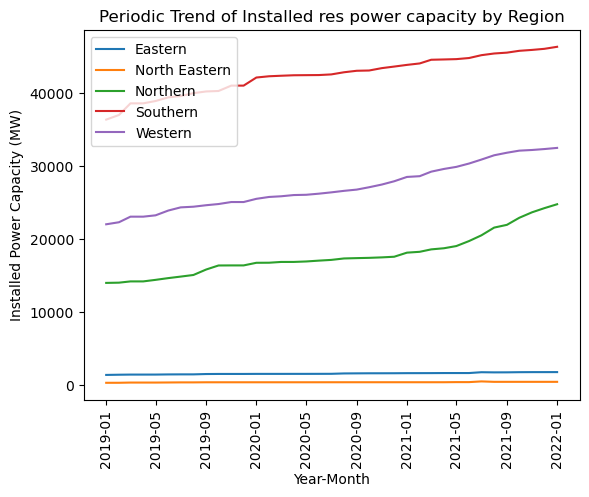

In [11]:
# Convert the 'month' column to a datetime format
df['month'] = pd.to_datetime(df['month'], format='%b-%Y')

# Create a pivot table of the installed power capacity columns with month as the index and source of energy as the columns
sources = ['coal', 'gas', 'diesel', 'nuclear', 'hydro', 'res'] 
for source in sources:
    # Create a pivot table of the grand_total column with month as the index and region as the columns
    df_pivot = df.pivot_table(values=source, index='month', columns='region', aggfunc='sum')

    # Plot each region separately using a loop
    for col in df_pivot.columns:
        plt.plot(df_pivot.index, df_pivot[col], label=col)

    # Add labels, legend, and title to the plot
    plt.xlabel('Year-Month')
    plt.ylabel('Installed Power Capacity (MW)')
    plt.xticks(rotation=90)  # Rotate x tick labels by 90 degrees
    plt.legend(loc='upper left')
    plt.title(f'Periodic Trend of Installed {source} power capacity by Region')

    # Display the plot
    plt.show()

C:\Users\PC\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_col : Removed 1 rows containing missing values.


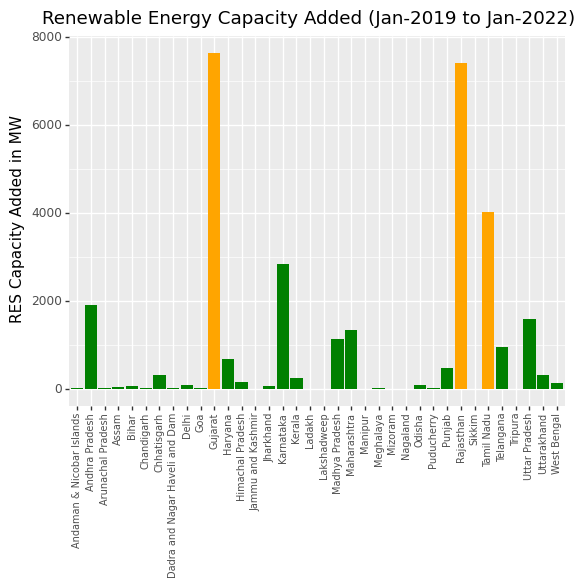

In [12]:
df = pd.read_csv("C:/Users/PC/Desktop/Work/DVProject/Power/Installed_Power_Capacity_State_wise_MW.csv")
df['year'] = df['month'].str[-4:].astype(int)
df['state'] = df['state'].replace({'Andhra Pradesh.': 'Andhra Pradesh'})
df[['Month', 'Year']] = df['month'].str.split('-', n=1, expand=True)
df_diu = df[df["state"] == "Daman & Diu"]
df_dnh = df[df["state"] == "Dadra & Nagar Haveli"]

df_diu_sum = df_diu.groupby(["month", "Year", "region"]).sum()
df_dnh_sum = df_dnh.groupby(["month", "Year", "region"]).sum()

df_combined = df_diu_sum.add(df_dnh_sum, fill_value=0)
 
df_combined["state"] = "Dadra and Nagar Haveli and Dam"

df_combined.reset_index(inplace=True)
df_combined.drop('year', axis=1, inplace=True)
df_combined = df_combined[['id', 'month', 'region', 'state', 'coal', 'gas', 'diesel', 'thermal_total', 'nuclear', 'hydro', 'res', 'grand_total']]

df = pd.read_csv("C:/Users/PC/Desktop/Work/DVProject/Power/Installed_Power_Capacity_State_wise_MW.csv")
df = df.drop(df[(df['state'] == 'Dadra & Nagar Haveli') | (df['state'] == 'Daman & Diu')].index)
df = pd.concat([df, df_combined])
df.reset_index(drop=True, inplace=True)
df.head()

df_filtered = df[df['month'].isin(['Jan-2019', 'Jan-2022'])]
 
df_pivot = df_filtered.pivot(index='state', columns='month', values='res')
 
df_pivot['RES Capacity Added in MW'] = (df_pivot['Jan-2022'] - df_pivot['Jan-2019'])  
 
df_pivot = df_pivot.reset_index()
 
top_states = df_pivot.sort_values(by='RES Capacity Added in MW', ascending=False)['state'][:3]

increment_plot = (ggplot(df_pivot, aes(x='state', y='RES Capacity Added in MW', fill=df_pivot['state'].isin(top_states)))
                  + geom_col(position=position_dodge(1), width=0.9)
                  + scale_fill_manual(values=["green", "orange"], guide=False)
                  + labs(x='State / Union territory (UT)', y='RES Capacity Added in MW',
                         title='Renewable Energy Capacity Added (Jan-2019 to Jan-2022)')
                  + theme(axis_text_x=element_text(angle=90, size=7),
                          axis_title_x=element_blank())
                  )

print(increment_plot)

C:\Users\PC\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_col : Removed 1 rows containing missing values.


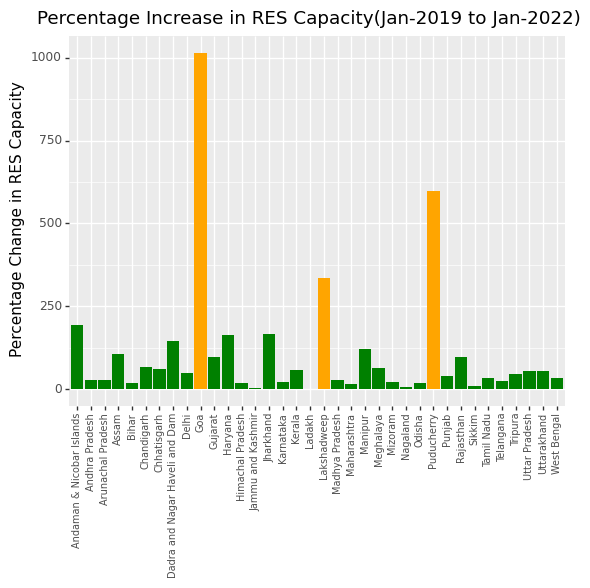

In [13]:
df_filtered = df[df['month'].isin(['Jan-2019', 'Jan-2022'])]

# Pivot the data to make it wide format
df_pivot = df_filtered.pivot(index='state', columns='month', values='res')

# Calculate the percentage increment between Jan-2019 and Jan-2022
df_pivot['RES Capacity Added in MW'] = (df_pivot['Jan-2022'] - df_pivot['Jan-2019']) / df_pivot['Jan-2019'] * 100

# Reset the index to make 'State / Union territory (UT)' a column again
df_pivot = df_pivot.reset_index()

# Define the top 3 states with highest RES capacity added
top_states = df_pivot.sort_values(by='RES Capacity Added in MW', ascending=False)['state'][:3]

# Create the bar plot and assign different fill colors to top 3 states
increment_plot = (
    ggplot(df_pivot, aes(x='state', y='RES Capacity Added in MW', fill=df_pivot['state'].isin(top_states)))
    + geom_col(position=position_dodge(1), width=0.9)
    + scale_fill_manual(values=["green", "orange"], guide=False)
    + labs(x='State / Union territory (UT)', y='Percentage Change in RES Capacity',
           title='Percentage Increase in RES Capacity(Jan-2019 to Jan-2022)')
    + theme(axis_text_x=element_text(angle=90, size=7),
            axis_title_x=element_blank())
)
print(increment_plot)

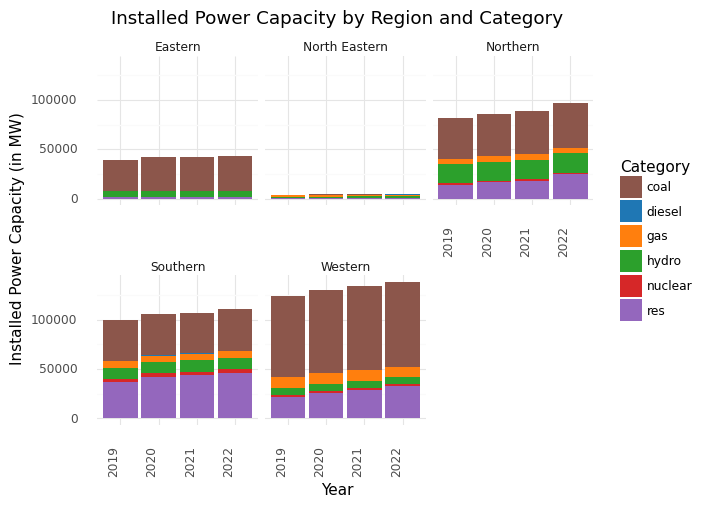

In [14]:
df[['Month', 'Year']] = df['month'].str.split('-', n=1, expand=True)
# Define the colors for each source
colors = {
    'diesel': 'tab:blue',
    'coal': 'tab:brown',
    'gas': 'tab:orange',
    'hydro': 'tab:green',
    'nuclear': 'tab:red',
    'res': 'tab:purple'
}

# Filter the data to include only January for each year
df_jan = df[df['Month'] == 'Jan']

# Sum the state capacities for each region and year
df_grouped = df_jan.groupby(['region', 'Year']).sum()[['coal', 'gas', 'diesel',  'nuclear', 'hydro', 'res']]
df_grouped = df_grouped.reset_index()

# Melt the DataFrame to a long format
df_melted = pd.melt(df_grouped, id_vars=['region', 'Year'], var_name='Category', value_name='Capacity')

# Create the stacked bar chart
stacked_bar_chart = (ggplot(df_melted, aes(x='Year', y='Capacity', fill='Category'))
                     + geom_bar(stat='identity')
                     + scale_fill_manual(values=colors)  # Use the color mappings
                     + labs(x='Year', y='Installed Power Capacity (in MW)', title='Installed Power Capacity by Region and Category')
                     + theme_minimal()
                     + theme(axis_text_x=element_text(angle=90, hjust=1),panel_spacing_y=0.5)
                     + facet_wrap('~region', ncol=3)
                    )

print(stacked_bar_chart)

### >>Power Capacity Installation trend Statewise and Regional Grid-wise

C:\Users\PC\AppData\Local\Temp\ipykernel_4340\3263925783.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


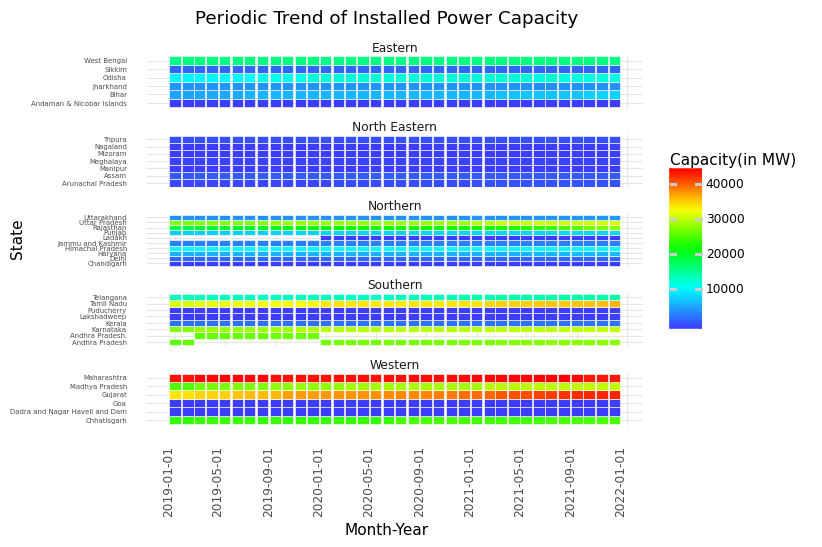

In [18]:
df['year'] = df['month'].str[-4:].astype(int)
df = df[df['year'] <= 2021]
# Convert 'month' column to datetime and sort it in ascending order
df['month_new'] = pd.to_datetime(df['month'], format='%b-%Y')
df = df.sort_values('month_new')

# Group by 'state' and 'month' and calculate the sum of 'grand_total'
df_heatmap = df.groupby(['region', 'state', 'month_new']).sum()['grand_total'].reset_index()

# Melt the DataFrame to a long format
df_heatmap = pd.melt(df_heatmap, id_vars=['region', 'state', 'month_new'], var_name='Category', value_name='Capacity(in MW)')

# Create the heatmap plot with a multi-color gradient and region-wise facets
heatmap_plot = (ggplot(df_heatmap, aes(x='month_new', y='state', fill='Capacity(in MW)'))
                + geom_tile(color='white', size=0.25)
                + scale_fill_gradientn(colors=['#3D3DFF', '#00FFFF', '#00FF00', '#FFFF00', '#FF0000'])
                + labs(x='Month-Year', y='State', title='Periodic Trend of Installed Power Capacity')
                + theme_minimal()
                + theme(axis_text_x=element_text(angle=90, hjust=1),
                        axis_text_y=element_text(size=5))
                + facet_wrap('~region',scales='free_y', ncol=1)
               )


print(heatmap_plot)

### >>Region Wise Power Source Distribution

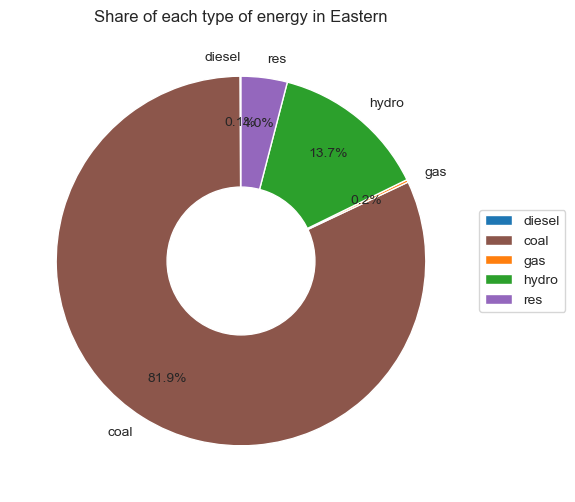

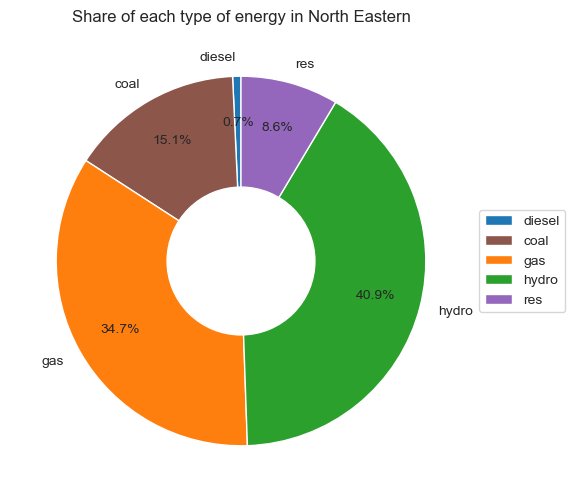

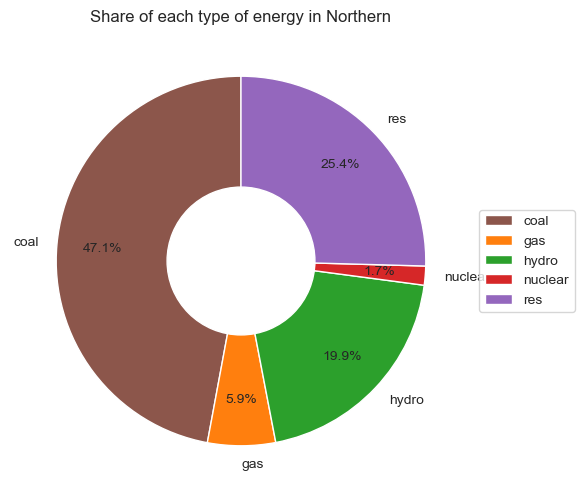

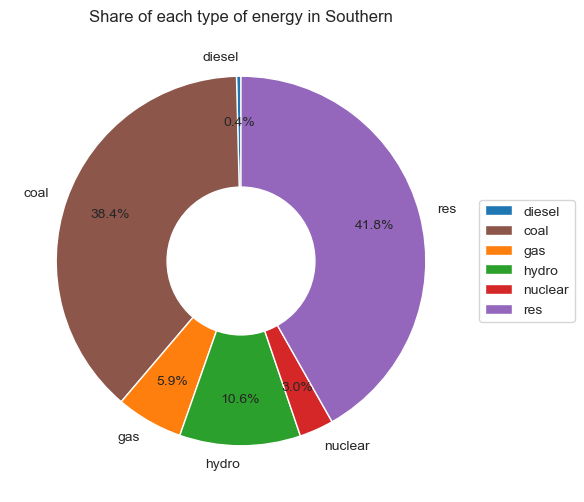

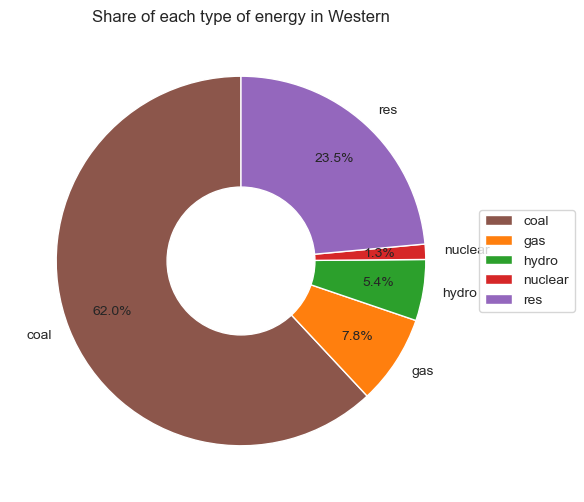

In [127]:
df_jan2022 = df[df['month'].isin(['Jan-2022'])]
df_pie = df_jan2022.groupby('region').sum()[['diesel','coal', 'gas', 'hydro', 'nuclear', 'res', 'grand_total']]
 
df_pie_pct = df_pie.apply(lambda x: x / x['grand_total'] * 100, axis=1)
df_pie_pct.drop('grand_total', axis=1, inplace=True)

inner_radius = 0.4
outer_radius = 1.0

colors = {
    'diesel': 'tab:blue',
    'coal': 'tab:brown',
    'gas': 'tab:orange',
    'hydro': 'tab:green',
    'nuclear': 'tab:red',
    'res': 'tab:purple'
}
 
for state in df_pie_pct.index:
    non_zero_pct = df_pie_pct.loc[state][df_pie_pct.loc[state] != 0.0]
    labels = non_zero_pct.index
    
    if len(labels) == 0:
        continue
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(non_zero_pct, labels=labels, radius=outer_radius, autopct='%1.1f%%', startangle=90, labeldistance=1.1, pctdistance=0.75, colors=[colors[source] for source in labels])
    ax.set_title(f'Share of each type of energy in {state}')
    ax.pie([100], radius=inner_radius, colors='w')
    
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

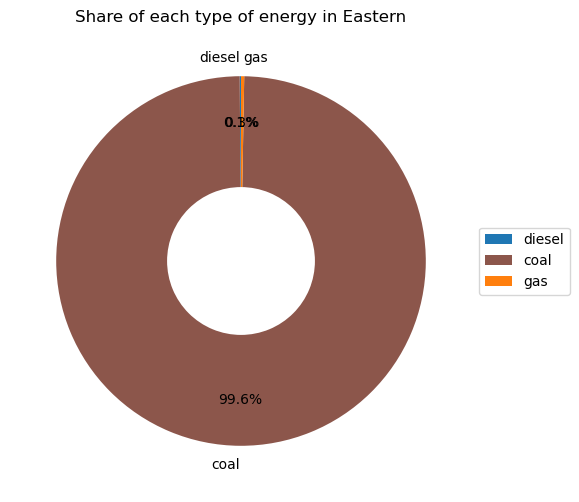

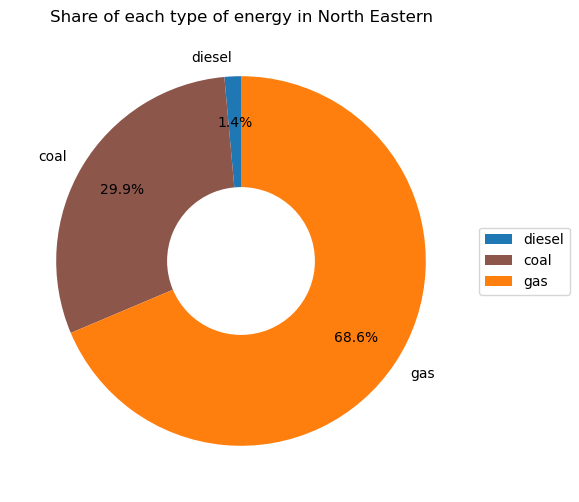

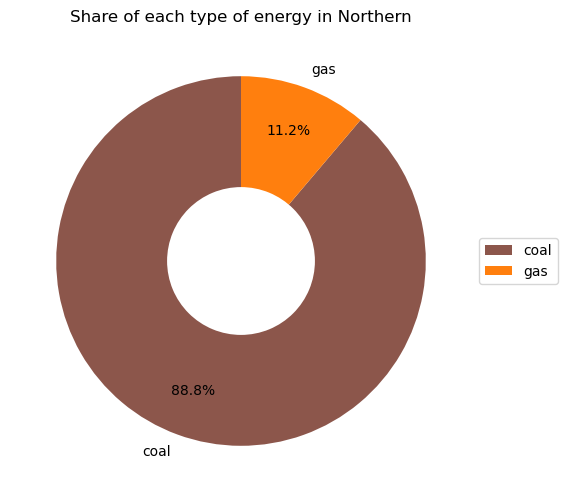

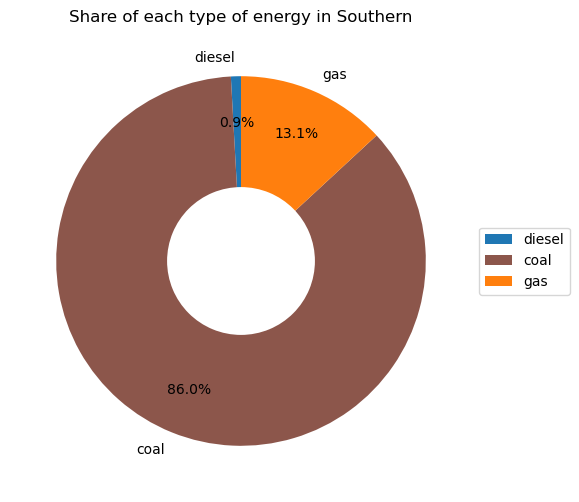

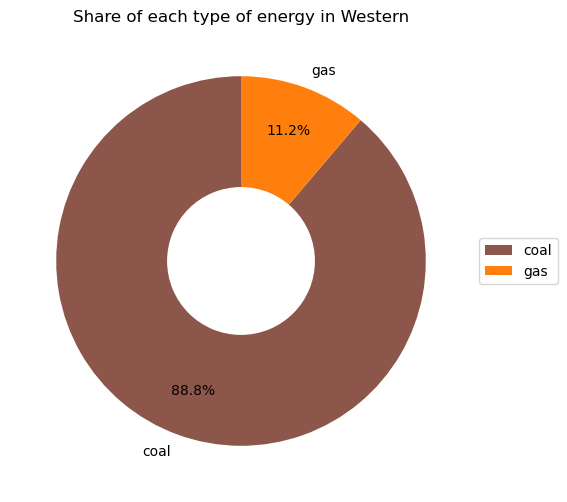

In [133]:
df_pie = df_jan2022.groupby('region').sum()[['diesel','coal', 'gas' , 'thermal_total']]
 
df_pie_pct = df_pie.apply(lambda x: x / x['thermal_total'] * 100, axis=1)
df_pie_pct.drop('thermal_total', axis=1, inplace=True)

inner_radius = 0.4
outer_radius = 1.0

colors = {
    'diesel': 'tab:blue',
    'coal': 'tab:brown',
    'gas': 'tab:orange',
}

for state in df_pie_pct.index:
    non_zero_pct = df_pie_pct.loc[state][df_pie_pct.loc[state] != 0.0]
    labels = non_zero_pct.index
  
    if len(labels) == 0:
        continue
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(non_zero_pct, labels=labels, radius=outer_radius, autopct='%1.1f%%', startangle=90, labeldistance=1.1, pctdistance=0.75, colors=[colors[source] for source in labels])
    ax.set_title(f'Share of each type of energy in {state}')
 
    ax.pie([100], radius=inner_radius, colors='w')
 
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    plt.show()

## >>GENERATION DATA 

In [4]:
data = pd.read_csv("C:/Users/PC/Desktop/Work/DVProject/Power/Power_Generation.csv")

In [5]:
# Create a dictionary to hold the separate data frames
dfs = {}

# Loop through each region and create a separate data frame for it
for region in data['Region'].unique():
    region_df = data[data['Region'] == region].copy()
    region_df.reset_index(drop=True, inplace=True)
    dfs[region] = region_df

northern_df = dfs['Northern']
western_df = dfs['Western']
southern_df = dfs['Southern']
eastern_df = dfs['Eastern']
northeastern_df = dfs['NorthEastern']

northern_df.fillna(northern_df.mean(), inplace=True)
western_df.fillna(western_df.mean(), inplace=True)
southern_df.fillna(southern_df.mean(), inplace=True)
eastern_df.fillna(eastern_df.mean(), inplace=True)
northeastern_df.fillna(northeastern_df.mean(), inplace=True)
northeastern_df = northeastern_df[['index','Date','Region','Thermal Generation Actual (in MU)','Thermal Generation Estimated (in MU)','Hydro Generation Actual (in MU)','Hydro Generation Estimated (in MU)']]
eastern_df =  eastern_df[['index','Date','Region','Thermal Generation Actual (in MU)','Thermal Generation Estimated (in MU)','Hydro Generation Actual (in MU)','Hydro Generation Estimated (in MU)']]

df = pd.concat([northern_df, western_df, southern_df, eastern_df, northeastern_df])
df.reset_index(drop=True, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_11816\3611620112.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\PC\AppData\Local\Temp\ipykernel_11816\3611620112.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\PC\AppData\Local\Temp\ipykernel_11816\3611620112.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\PC\AppData\Local\Temp\ipykernel_11816\3611620112.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is 

In [118]:
eastern_monthly.head()

,Date,index,Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,2017-09-30,2265.0,2495.63,2132.60
1,2017-10-31,6765.0,1900.80,1877.96
2,2017-11-30,11265.0,1102.50,1027.50
3,2017-12-31,16368.0,700.60,751.86
4,2018-01-31,21173.0,674.56,694.18


In [117]:
southern_monthly.head()

,Date,index,Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,2017-09-30,2265.0,2495.63,2132.60
1,2017-10-31,6765.0,1900.80,1877.96
2,2017-11-30,11265.0,1102.50,1027.50
3,2017-12-31,16368.0,700.60,751.86
4,2018-01-31,21173.0,674.56,694.18


C:\Users\PC\AppData\Local\Temp\ipykernel_11816\223292910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


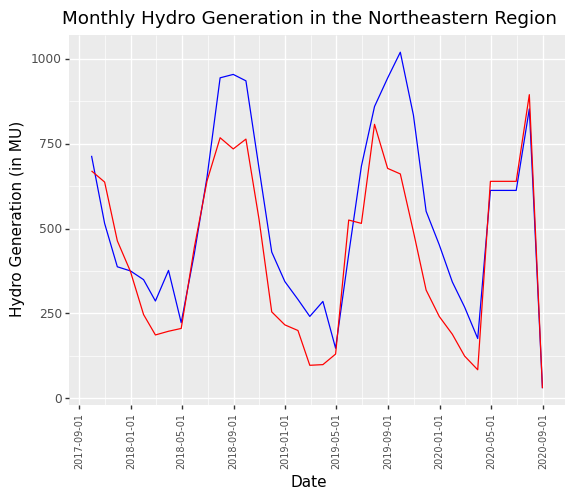

<ggplot: (135896506082)>

In [6]:

northeastern_df.head()
northeastern_df['Date'] = pd.to_datetime(northeastern_df['Date']) # Convert Date column to datetime format
northeastern_monthly = northeastern_df.groupby(pd.Grouper(key='Date', freq='M')).sum().reset_index()
northeastern_monthly.replace(0, np.nan, inplace=True)
northeastern_monthly.replace(0.00, np.nan, inplace=True)
northeastern_monthly = northeastern_monthly.interpolate(method='backfill')
northeastern_monthly.head()
(ggplot(northeastern_monthly, aes(x='Date', y='Hydro Generation Actual (in MU)')) + 
  geom_line(color='blue') +
  geom_line(aes(x='Date', y='Hydro Generation Estimated (in MU)'), color='red') +
  labs(title='Monthly Hydro Generation in the Northeastern Region', x='Date', y='Hydro Generation (in MU)')
 + theme(axis_text_x=element_text(angle=90, size=7) ))

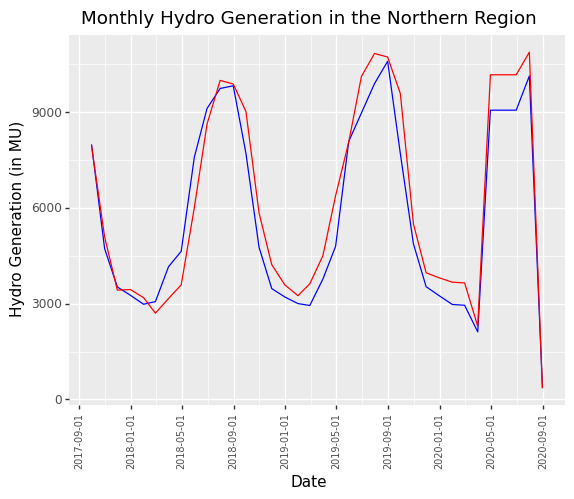

<ggplot: (176482329061)>

In [108]:
northern_df.head()
northern_df['Date'] = pd.to_datetime(northern_df['Date']) # Convert Date column to datetime format
northern_monthly = northern_df.groupby(pd.Grouper(key='Date', freq='M')).sum().reset_index()
northern_monthly.replace(0, np.nan, inplace=True)
northern_monthly.replace(0.00, np.nan, inplace=True)
northern_monthly = northern_monthly.interpolate(method='backfill')
northern_monthly.head()
(ggplot(northern_monthly, aes(x='Date', y='Hydro Generation Actual (in MU)')) + 
  geom_line(color='blue') +
  geom_line(aes(x='Date', y='Hydro Generation Estimated (in MU)'), color='red') +
  labs(title='Monthly Hydro Generation in the Northern Region', x='Date', y='Hydro Generation (in MU)')
 + theme(axis_text_x=element_text(angle=90, size=7) ))

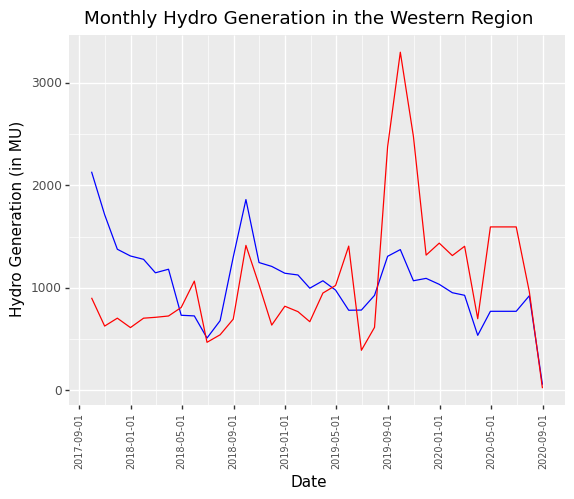

<ggplot: (176482369088)>

In [109]:
western_df.head()
western_df['Date'] = pd.to_datetime(western_df['Date']) # Convert Date column to datetime format
western_monthly = western_df.groupby(pd.Grouper(key='Date', freq='M')).sum().reset_index()
western_monthly.replace(0, np.nan, inplace=True)
western_monthly.replace(0.00, np.nan, inplace=True)
western_monthly = western_monthly.interpolate(method='backfill')
western_monthly.head()
(ggplot(western_monthly, aes(x='Date', y='Hydro Generation Actual (in MU)')) + 
  geom_line(color='blue') +
  geom_line(aes(x='Date', y='Hydro Generation Estimated (in MU)'), color='red') +
  labs(title='Monthly Hydro Generation in the Western Region', x='Date', y='Hydro Generation (in MU)')
 + theme(axis_text_x=element_text(angle=90, size=7) ))

C:\Users\PC\AppData\Local\Temp\ipykernel_7324\1641135932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


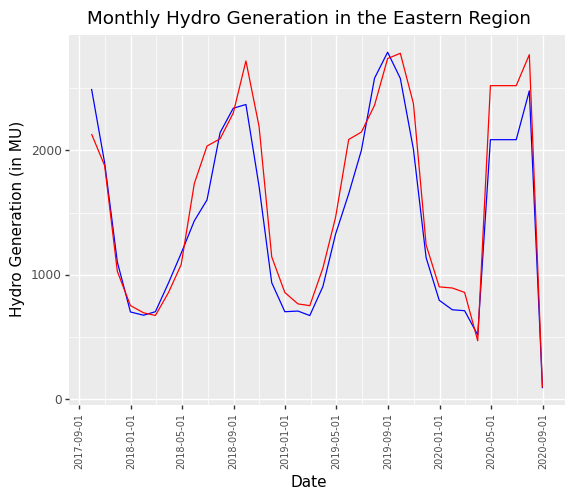

<ggplot: (176483788493)>

In [113]:
eastern_df.head()
eastern_df['Date'] = pd.to_datetime(western_df['Date']) # Convert Date column to datetime format
eastern_monthly = eastern_df.groupby(pd.Grouper(key='Date', freq='M')).sum().reset_index()
eastern_monthly.replace(0, np.nan, inplace=True)
eastern_monthly.replace(0.00, np.nan, inplace=True)
eastern_monthly = eastern_monthly.interpolate(method='backfill')
eastern_monthly.head()
(ggplot(eastern_monthly, aes(x='Date', y='Hydro Generation Actual (in MU)')) + 
  geom_line(color='blue') +
  geom_line(aes(x='Date', y='Hydro Generation Estimated (in MU)'), color='red') +
  labs(title='Monthly Hydro Generation in the Eastern Region', x='Date', y='Hydro Generation (in MU)')
 + theme(axis_text_x=element_text(angle=90, size=7) ))

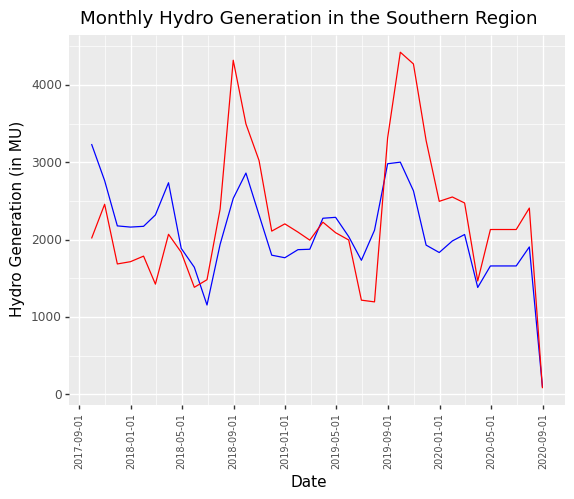

<ggplot: (176484002030)>

In [119]:
southern_df.head()
southern_df['Date'] = pd.to_datetime(western_df['Date']) # Convert Date column to datetime format
southern_monthly = southern_df.groupby(pd.Grouper(key='Date', freq='M')).sum().reset_index()
southern_monthly.replace(0, np.nan, inplace=True)
southern_monthly.replace(0.00, np.nan, inplace=True)
southern_monthly = southern_monthly.interpolate(method='backfill')
southern_monthly.head()
(ggplot(southern_monthly, aes(x='Date', y='Hydro Generation Actual (in MU)')) + 
  geom_line(color='blue') +
  geom_line(aes(x='Date', y='Hydro Generation Estimated (in MU)'), color='red') +
  labs(title='Monthly Hydro Generation in the Southern Region', x='Date', y='Hydro Generation (in MU)')
 + theme(axis_text_x=element_text(angle=90, size=7) ))

In [82]:
northern_monthly['Year'] = northern_monthly['Date'].dt.year

In [161]:
northern_monthly.head()

,Date,index,Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Year
0,2017-09-30,2175,880.44,955.82,7993.64,7946.24,2017
1,2017-10-31,6675,774.00,1087.77,4723.80,5087.98,2017
2,2017-11-30,11175,594.00,1109.62,3525.00,3424.77,2017
3,2017-12-31,16275,889.60,1088.86,3262.13,3443.43,2017
4,2018-01-31,21080,939.61,996.00,2981.58,3189.30,2018


In [163]:
df_current = df[df['month'].isin(['Jan-2022'])]
df_current.head()

,id,month,region,state,coal,gas,diesel,thermal_total,nuclear,hydro,res,grand_total
1317,1426,Jan-2022,Northern,Chandigarh,0.0,0.00,0.0,0.00,0.0,0.00,53.45,53.45
1318,1427,Jan-2022,Northern,Delhi,0.0,2208.40,0.0,2208.40,0.0,0.00,263.12,2471.52
1319,1428,Jan-2022,Northern,Haryana,5330.0,431.59,0.0,5761.59,0.0,0.00,1086.88,6848.47
1320,1429,Jan-2022,Northern,Himachal Pradesh,0.0,0.00,0.0,0.00,0.0,10065.02,1031.82,11096.84
1321,1430,Jan-2022,Northern,Jammu and Kashmir,0.0,175.00,0.0,175.00,0.0,3360.00,191.55,3726.55


### >> GEOGRAPHICAL PLOTS

In [22]:
pip install pyshp


     -------------------------------------- 46.5/46.5 kB 585.4 kB/s eta 0:00:00


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import shapefile as shp

In [24]:
from shapely.geometry import Point
sns.set_style('whitegrid')

In [26]:
fp = r'C:/Users/PC/Desktop/Work/DVProject/Maps_with_python-master/india-polygon.shp'
map_df = gpd.read_file(fp) 
map_df_copy = gpd.read_file(fp)
map_df.head()

,id,st_nm,geometry
0,NaN,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,NaN,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,NaN,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,NaN,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,NaN,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


<AxesSubplot:>

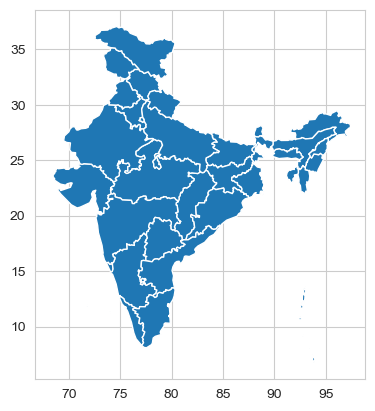

In [27]:
map_df.plot()

In [143]:
df = pd.read_csv("C:/Users/PC/Desktop/Work/DVProject/Power/Installed_Power_Capacity_State_wise_MW.csv")
df['year'] = df['month'].str[-4:].astype(int)
df['state'] = df['state'].replace({'Andhra Pradesh.': 'Andhra Pradesh'})
df[['Month', 'Year']] = df['month'].str.split('-', n=1, expand=True)
df_diu = df[df["state"] == "Daman & Diu"]
df_dnh = df[df["state"] == "Dadra & Nagar Haveli"]

df_diu_sum = df_diu.groupby(["month", "Year", "region"]).sum()
df_dnh_sum = df_dnh.groupby(["month", "Year", "region"]).sum()

df_combined = df_diu_sum.add(df_dnh_sum, fill_value=0)
 
df_combined["state"] = "Dadra and Nagar Haveli and Dam"

df_combined.reset_index(inplace=True)
df_combined.drop('year', axis=1, inplace=True)
df_combined = df_combined[['id', 'month', 'region', 'state', 'coal', 'gas', 'diesel', 'thermal_total', 'nuclear', 'hydro', 'res', 'grand_total']]

df = pd.read_csv("C:/Users/PC/Desktop/Work/DVProject/Power/Installed_Power_Capacity_State_wise_MW.csv")
df = df.drop(df[(df['state'] == 'Dadra & Nagar Haveli') | (df['state'] == 'Daman & Diu')].index)
df = pd.concat([df, df_combined])
df.reset_index(drop=True, inplace=True)
df.head()

,id,month,region,state,coal,gas,diesel,thermal_total,nuclear,hydro,res,grand_total
0,1,Jan-2019,Northern,Chandigarh,0.0,0.00,0.0,0.00,0.0,0.00,32.40,32.40
1,2,Jan-2019,Northern,Delhi,135.0,2208.40,0.0,2343.40,0.0,0.00,176.21,2519.61
2,3,Jan-2019,Northern,Haryana,5540.0,431.59,0.0,5971.59,0.0,0.00,411.99,6383.58
3,4,Jan-2019,Northern,Himachal Pradesh,0.0,0.00,0.0,0.00,0.0,9809.02,864.50,10673.52
4,5,Jan-2019,Northern,Jammu and Kashmir,0.0,175.00,0.0,175.00,0.0,3449.00,188.88,3812.88


In [150]:
df_jan2022 = df[df['month'].isin(['Jan-2022'])]
df_jan2022.head()

,id,month,region,state,coal,gas,diesel,thermal_total,nuclear,hydro,res,grand_total
1251,1426,Jan-2022,Northern,Chandigarh,0.0,0.00,0.0,0.00,0.0,0.00,53.45,53.45
1252,1427,Jan-2022,Northern,Delhi,0.0,2208.40,0.0,2208.40,0.0,0.00,263.12,2471.52
1253,1428,Jan-2022,Northern,Haryana,5330.0,431.59,0.0,5761.59,0.0,0.00,1086.88,6848.47
1254,1429,Jan-2022,Northern,Himachal Pradesh,0.0,0.00,0.0,0.00,0.0,10065.02,1031.82,11096.84
1255,1430,Jan-2022,Northern,Jammu and Kashmir,0.0,175.00,0.0,175.00,0.0,3360.00,191.55,3726.55


In [151]:
df_new = df_jan2022[['state','grand_total']]
df_res = df_jan2022[['state','res']]

In [152]:
df_new["state"].replace("Chhatisgarh", "Chhattisgarh",inplace = True)
df_new["state"].replace("Dadra and Nagar Haveli and Dam", "Dadra and Nagar Haveli",inplace = True)

df_res["state"].replace("Chhatisgarh", "Chhattisgarh",inplace = True)
df_res["state"].replace("Dadra and Nagar Haveli and Dam", "Dadra and Nagar Haveli",inplace = True)

C:\Users\PC\AppData\Local\Temp\ipykernel_7324\545615514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\PC\AppData\Local\Temp\ipykernel_7324\545615514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\PC\AppData\Local\Temp\ipykernel_7324\545615514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\PC\AppData\Local\Temp\ipykernel_7324\545615514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a c

In [153]:
#Merging the data
merged = map_df.set_index('st_nm').join(df_new.set_index('state'))
merged['grand_total'] = merged['grand_total'].replace(np.nan, 0)

#Merging the data
merged_res = map_df.set_index('st_nm').join(df_res.set_index('state'))
merged_res['res'] = merged_res['res'].replace(np.nan, 0)

<AxesSubplot:title={'center':'Installed Power Capacity in India state-wise'}>

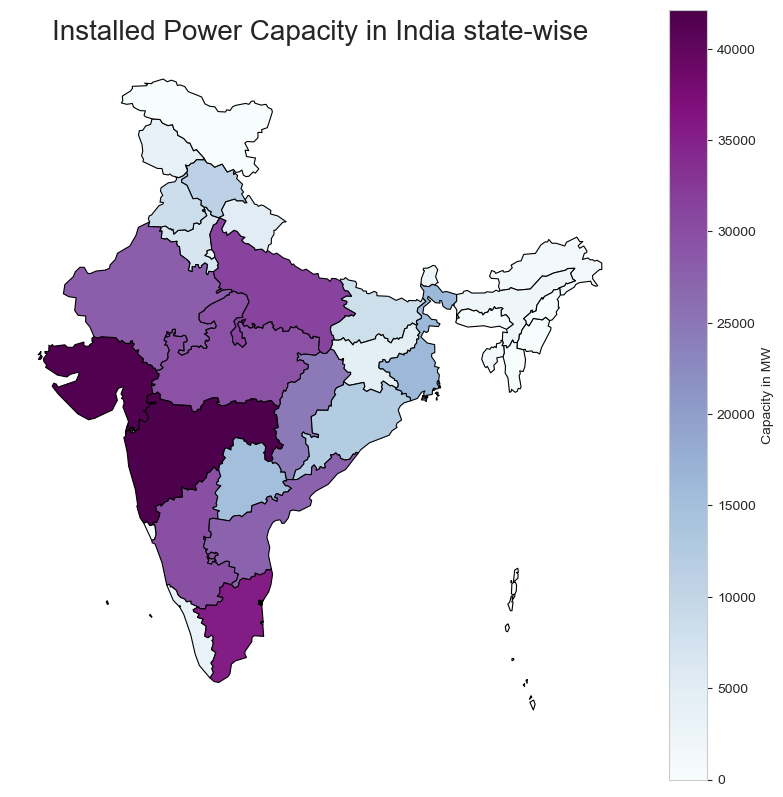

In [154]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Installed Power Capacity in India state-wise', fontdict={'fontsize': '20', 'fontweight' : '10'})
merged.plot(column='grand_total', cmap='BuPu', linewidth=0.8, ax=ax, edgecolor='0', legend=True, markersize=[39.739192, -104.990337], legend_kwds={'label': "Capacity in MW"})

<AxesSubplot:title={'center':'Installed RES Power Capacity in India state-wise'}>

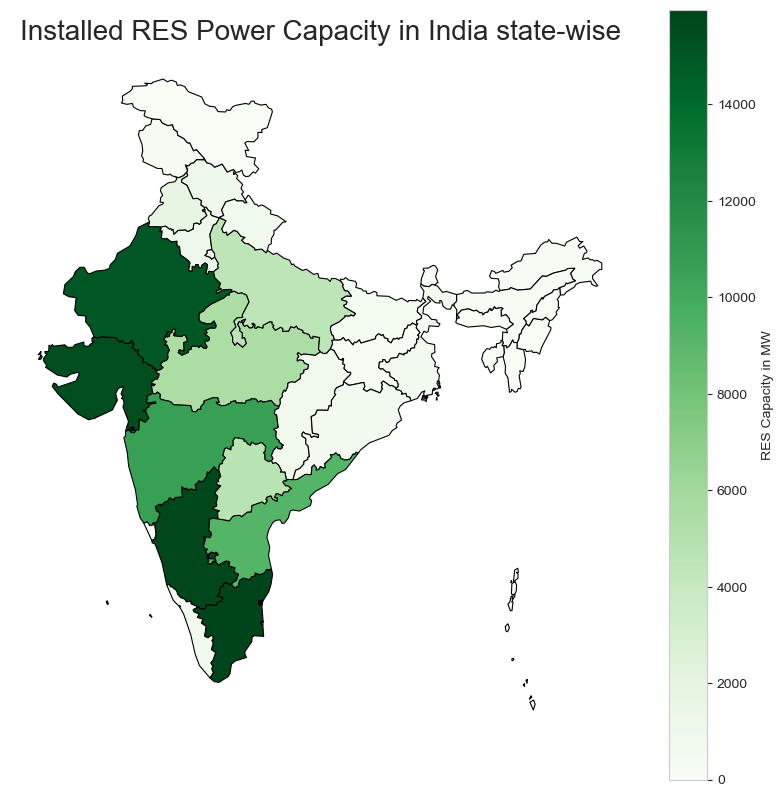

In [155]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Installed RES Power Capacity in India state-wise', fontdict={'fontsize': '20', 'fontweight' : '10'})
merged_res.plot(column='res', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0', legend=True, markersize=[39.739192, -104.990337], legend_kwds={'label': "RES Capacity in MW"})

In [24]:
df_3 = pd.read_csv("C:/Users/PC/Desktop/Work/DVProject/Power/target.csv")

In [21]:
df_3.head()

,State,Installed as of December 2022,Target
1,Andaman & Nicobar,35.16,27
2,Andhra Pradesh,9349.52,18477
3,Arunachal Pradesh,144.63,539
4,Assam,184.03,688
5,Bihar,389.61,2762


In [17]:
from plotnine import *
import pandas as pd
 
df_3 = pd.read_csv("C:/Users/PC/Desktop/Work/DVProject/Power/target.csv")
df_3 = df_3[['State', 'Installed as of December 2022', 'Target']]
df_3 = df_3[df_3['State'] != 'India (total)'] 
melted_df = df_3.melt(id_vars='State', var_name='Metric', value_name='Value')

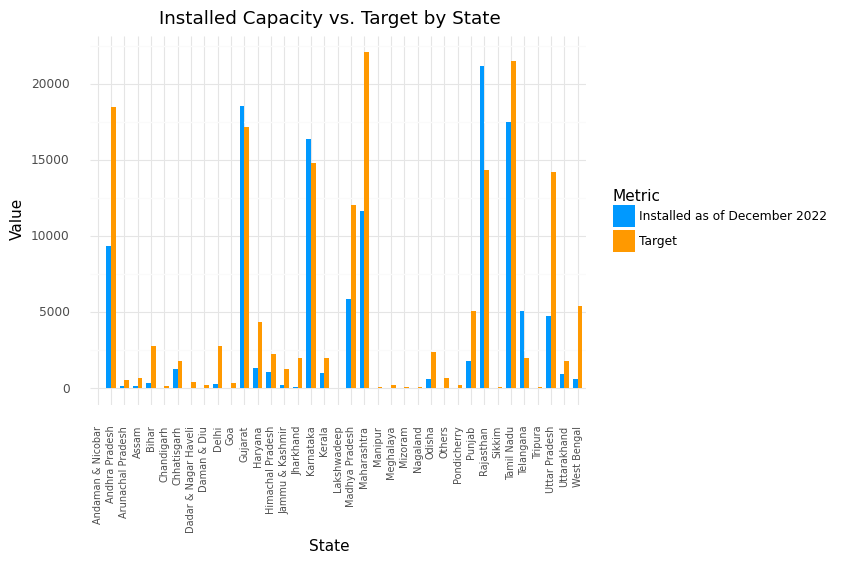

In [22]:
custom_palette = ['#0099ff', '#ff9900']
 
bar_plot = (ggplot(melted_df, aes(x='State', y='Value', fill='Metric'))
            + geom_bar(stat='identity', position='dodge', width=0.7)
            + scale_fill_manual(values=custom_palette)
            + labs(title='Installed Capacity vs. Target by State', x='State', y='Value', fill='Metric')
            + theme_minimal()
            + theme(legend_position='right', axis_text_x=element_text(angle=90, size=7))
           )
print(bar_plot)

In [33]:
df_4 = pd.read_csv("C:/Users/PC/Desktop/Work/DVProject/Power/capacity_res_india.csv")
df_4 = df_4[df_4['State'] == 'Gujarat']
df_4.head()
 

,State,Date,Solar,Wind,Small hydro,Bioenergy
57,Gujarat,2019-03,2440.13,6073.07,61.30,77.3
94,Gujarat,2019-04,2493.85,6102.67,61.30,77.3
131,Gujarat,2019-05,2564.14,6290.47,61.30,77.3
168,Gujarat,2019-06,2622.21,6563.07,62.35,77.3
205,Gujarat,2019-07,2647.72,6860.77,62.35,77.3
